In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.069454,140.992782,1997.831867,2156.879762
std,4.226124,0.046071,62.275067,8.371760,1626.382724
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.200000,266.888400,2009.000000,6528.169000


In [4]:
df.groupby(by='Item_Fat_Content').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,12.923642,0.067675,140.714098,1997.812398,2133.298143
Regular,12.736520,0.072719,141.504259,1997.867598,2200.159799


Average Outlet Sales on Low Fat is more than the Outlet Sales on Regular type

In [5]:
#Average Item_Outlet_Sales based on Item_Type
df.groupby(by='Item_Type').mean().sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Starchy Foods,13.589410,0.073440,147.838023,1998.581081,2352.343378
Seafood,12.614756,0.076978,141.841719,1997.734375,2326.065928
Fruits and Vegetables,13.161297,0.072249,144.581235,1997.719968,2254.191818
Snack Foods,12.964871,0.069866,146.194934,1997.886667,2251.023194
Household,13.297274,0.064248,149.424753,1997.784615,2235.360578
Canned,12.399254,0.070897,139.763832,1998.152542,2208.583758
Breads,11.629818,0.069999,140.952669,1997.657371,2185.728559
Dairy,13.329387,0.075244,148.499208,1997.681818,2182.069685
Meat,12.825689,0.064581,139.882032,1997.341176,2137.799204


Average Item Outlet Sales is more emphasised on Starchy Food and Sea Food

In [6]:
# Maximum Outlet Sales by Outlet_Type
df.groupby(by='Outlet_Type').max()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Outlet_Type,,,,,,,,,,,
Grocery Store,NCZ54,21.350000,Regular,0.200000,Starchy Foods,266.6884,OUT019,1998,Small,Tier 3,1775.6886
Supermarket Type1,NCZ54,21.350000,Regular,0.188620,Starchy Foods,266.8884,OUT049,2007,Small,Tier 3,6528.1690
Supermarket Type2,NCZ54,21.350000,Regular,0.188323,Starchy Foods,265.1884,OUT018,2009,Medium,Tier 3,6528.1690
Supermarket Type3,NCZ54,12.857645,Regular,0.183948,Starchy Foods,265.2884,OUT027,1985,Medium,Tier 3,6528.1690


In [7]:
def corr_visual(x,y,data):
    plt.figure(figsize=(13.66,7.68))
    plt.subplot(121)
    sns.regplot(x=x, y=y,data=data)
    plt.plot()
    plt.subplot(122)
    sns.residplot(x=x,y=y,data=data)
    plt.plot()

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.012357
Item_Outlet_Sales,0.012357,1.000000


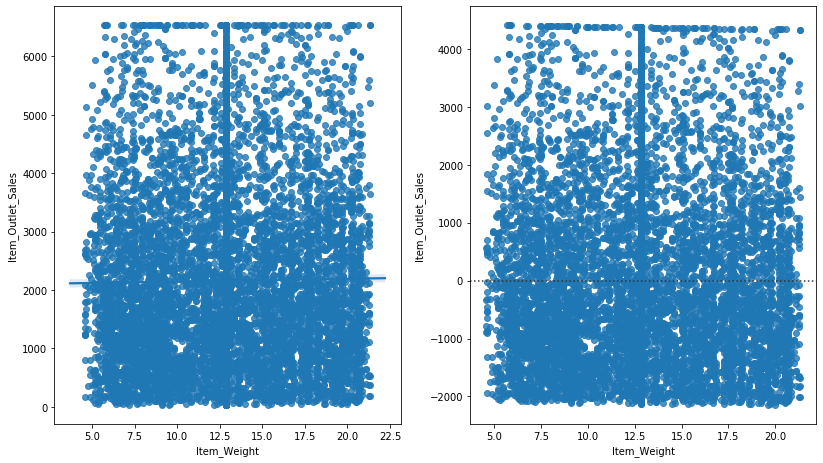

In [8]:
corr_visual(x='Item_Weight',y='Item_Outlet_Sales',data=df)
df[['Item_Weight','Item_Outlet_Sales']].corr()

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,1.000000,-0.127109
Item_Outlet_Sales,-0.127109,1.000000


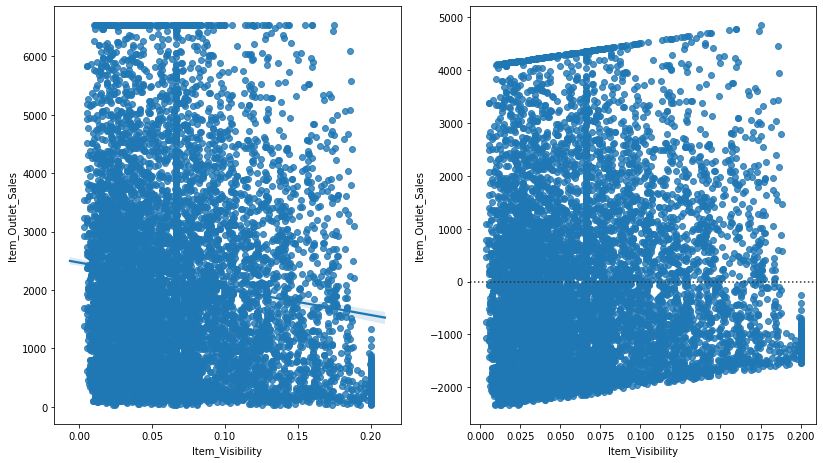

In [9]:
corr_visual(x='Item_Visibility',y='Item_Outlet_Sales',data=df)
df[['Item_Visibility','Item_Outlet_Sales']].corr()

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.574478
Item_Outlet_Sales,0.574478,1.000000


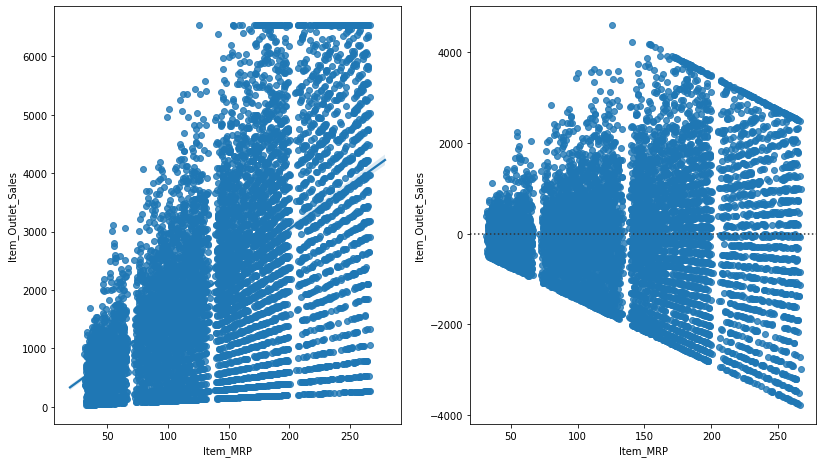

In [10]:
corr_visual(x='Item_MRP',y='Item_Outlet_Sales',data=df)
df[['Item_MRP','Item_Outlet_Sales']].corr()

[]

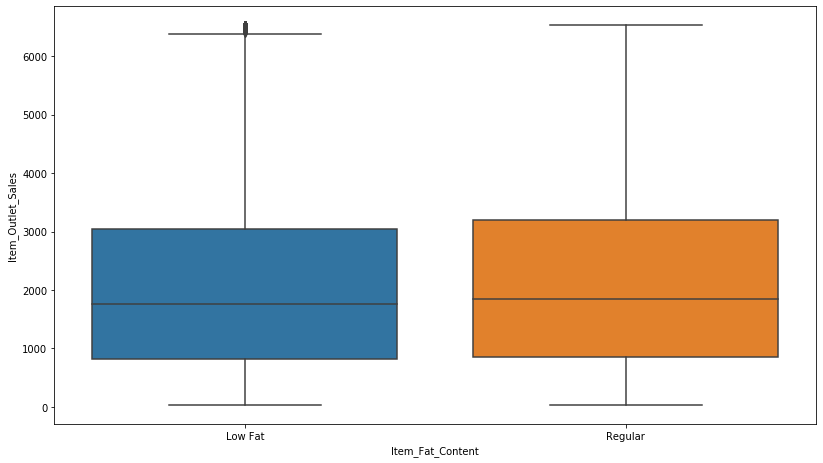

In [11]:
plt.figure(figsize=[13.66,7.68])
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)
plt.plot()

[]

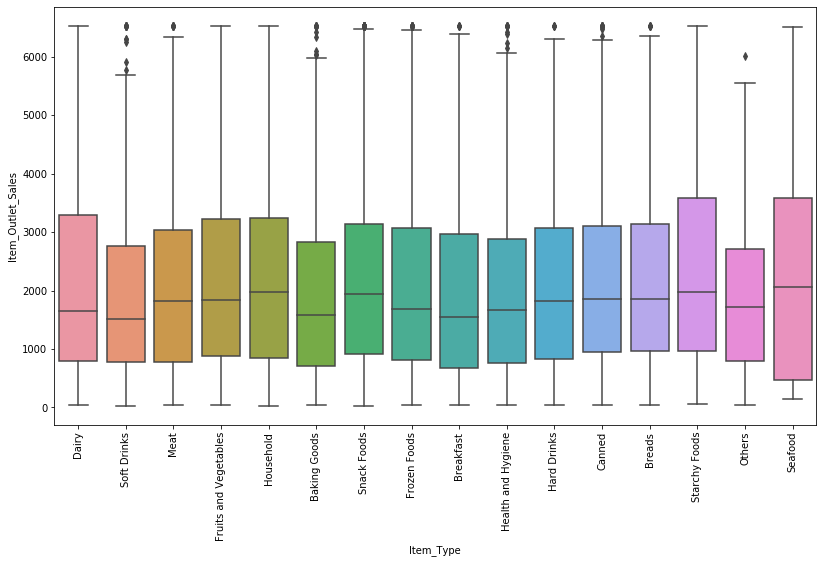

In [12]:
plt.figure(figsize=[13.66,7.68])
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df)
plt.xticks(rotation='vertical')
plt.plot()

[]

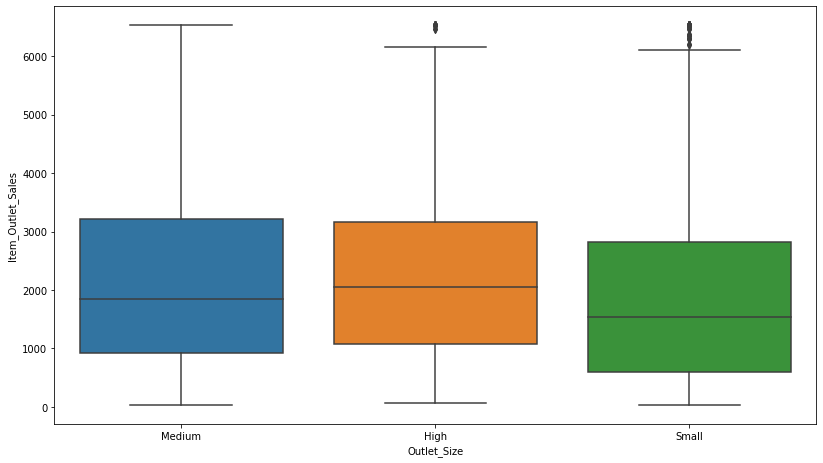

In [13]:
plt.figure(figsize=[13.66,7.68])
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)
plt.plot()

[]

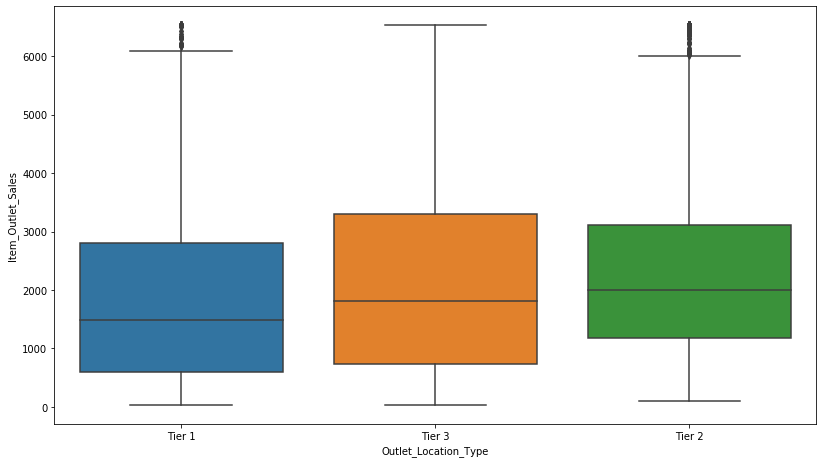

In [14]:
plt.figure(figsize=[13.66,7.68])
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)
plt.plot()

[]

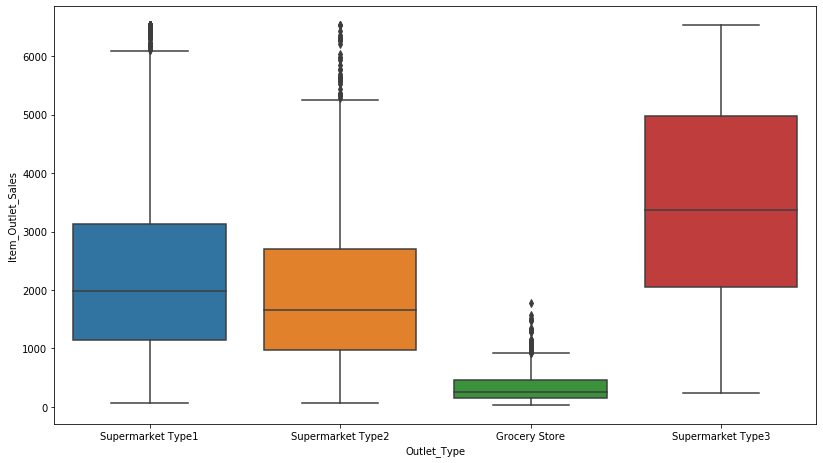

In [15]:
plt.figure(figsize=[13.66,7.68])
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
plt.plot()

<h2>Feature Selection

<h4>Estimating Pearson Correlation/Coefficient of Determination

In [16]:
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
for i in columns:
    pearson_coef, p_value = stats.pearsonr(df[i], df['Item_Outlet_Sales'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.012356968360624866  with a P-value of P = 0.2540061428751978
The Pearson Correlation Coefficient is -0.12710855928429285  with a P-value of P = 4.9046454191768754e-32
The Pearson Correlation Coefficient is 0.5744775891174628  with a P-value of P = 0.0
The Pearson Correlation Coefficient is -0.03735533029893372  with a P-value of P = 0.0005619468698929317


<h4>ANOVA: Estimating F-Score and p-value

In [17]:
# For Item_Fat_Content
grouped_test = df[['Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Fat_Content'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Low Fat')['Item_Outlet_Sales'],
                              grouped_test.get_group('Regular')['Item_Outlet_Sales'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 3.2894620960199066 , P = 0.06976102243168737


In [18]:
# For Item Type
grouped_test = df[['Item_Type','Item_Outlet_Sales']].groupby(['Item_Type'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Fruits and Vegetables')['Item_Outlet_Sales'],
                              grouped_test.get_group('Snack Foods')['Item_Outlet_Sales'],
                              grouped_test.get_group('Household')['Item_Outlet_Sales'],
                              grouped_test.get_group('Frozen Foods')['Item_Outlet_Sales'],
                              grouped_test.get_group('Dairy')['Item_Outlet_Sales'],
                              grouped_test.get_group('Canned')['Item_Outlet_Sales'],
                              grouped_test.get_group('Baking Goods')['Item_Outlet_Sales'],
                              grouped_test.get_group('Health and Hygiene')['Item_Outlet_Sales'],
                              grouped_test.get_group('Soft Drinks')['Item_Outlet_Sales'],
                              grouped_test.get_group('Meat')['Item_Outlet_Sales'],
                              grouped_test.get_group('Breads')['Item_Outlet_Sales'],
                              grouped_test.get_group('Hard Drinks')['Item_Outlet_Sales'],
                              grouped_test.get_group('Others')['Item_Outlet_Sales'],
                              grouped_test.get_group('Starchy Foods')['Item_Outlet_Sales'],
                              grouped_test.get_group('Breakfast')['Item_Outlet_Sales'],
                              grouped_test.get_group('Seafood')['Item_Outlet_Sales'],
                             )
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2.6921620299821414 , P = 0.0004060202009695738


In [19]:
#For Outlet_Identifier
grouped_test = df[['Outlet_Identifier','Item_Outlet_Sales']].groupby(['Outlet_Identifier'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('OUT027')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT013')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT049')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT046')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT035')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT045')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT018')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT017')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT010')['Item_Outlet_Sales'],
                              grouped_test.get_group('OUT019')['Item_Outlet_Sales'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 309.1361123400386 , P = 0.0


In [20]:
#For Outlet_Size
grouped_test = df[['Outlet_Size','Item_Outlet_Sales']].groupby(['Outlet_Size'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Medium')['Item_Outlet_Sales'],
                              grouped_test.get_group('Small')['Item_Outlet_Sales'],
                              grouped_test.get_group('High')['Item_Outlet_Sales'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 40.84025500827837 , P = 2.2273229904361193e-18


In [21]:
#For Outlet_Location_Type
grouped_test = df[['Outlet_Location_Type','Item_Outlet_Sales']].groupby(['Outlet_Location_Type'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Tier 3')['Item_Outlet_Sales'],
                              grouped_test.get_group('Tier 2')['Item_Outlet_Sales'],
                              grouped_test.get_group('Tier 1')['Item_Outlet_Sales'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 53.97638116923888 , P = 5.0771695922623015e-24


In [22]:
#For Outlet_Type
grouped_test = df[['Outlet_Type','Item_Outlet_Sales']].groupby(['Outlet_Type'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Supermarket Type1')['Item_Outlet_Sales'],
                              grouped_test.get_group('Grocery Store')['Item_Outlet_Sales'],
                              grouped_test.get_group('Supermarket Type3')['Item_Outlet_Sales'],
                              grouped_test.get_group('Supermarket Type2')['Item_Outlet_Sales'])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 921.0143621622308 , P = 0.0


<h2>Conclusion

On getting the idea of what our data looks like and which varaibles are important to take into account while predicting the Item Outlet Sales. These are:

<h4>Continuous Numerical Variables:</h4>

- Item_MRP
   
<h4>Categorical variables:</h4>

- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

Now we will move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.